## Feature Selection-Information gain - mutual information In Classification Problem Statements

In [116]:
import pandas as pd

In [117]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [118]:
df['Wine'].unique() #target variable

array([1, 2, 3], dtype=int64)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [120]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X = df.drop(['Wine'],axis = 1) #independent var
y = df['Wine'] #dependent var


In [121]:
X_train,X_test,y_train,y_test=train_test_split(X, #INDEPENDENDENT VARIABLE
    y, #wine as DEPENDENT VARIABLE
    test_size=0.3, #70% TRAINING DS AND 30% TEST DATA
    random_state=0)

In [122]:
X_train.shape

(124, 13)

In [123]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info #impactful variable will get high value and less impactfull will get low values

array([0.42656779, 0.30267074, 0.16918857, 0.27656867, 0.19073977,
       0.48563917, 0.71510361, 0.102331  , 0.26911198, 0.61362445,
       0.54456178, 0.55122187, 0.52270305])

In [124]:
len(mutual_info)

13

In [125]:
lst = [11,22,33,44]

In [126]:
lst

[11, 22, 33, 44]

In [127]:
ser = pd.Series(lst)

In [128]:
ser

0    11
1    22
2    33
3    44
dtype: int64

In [129]:
index = ['a','b','c','d']


In [130]:
ser.index = index

In [131]:
ser

a    11
b    22
c    33
d    44
dtype: int64

In [132]:
mutual_info

array([0.42656779, 0.30267074, 0.16918857, 0.27656867, 0.19073977,
       0.48563917, 0.71510361, 0.102331  , 0.26911198, 0.61362445,
       0.54456178, 0.55122187, 0.52270305])

In [133]:
mutual_info = pd.Series(mutual_info)


In [134]:
mutual_info

0     0.426568
1     0.302671
2     0.169189
3     0.276569
4     0.190740
5     0.485639
6     0.715104
7     0.102331
8     0.269112
9     0.613624
10    0.544562
11    0.551222
12    0.522703
dtype: float64

In [135]:
X_train

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [136]:
X_train.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [137]:
mutual_info.index = X_train.columns


In [138]:
mutual_info


Alcohol                 0.426568
Malic.acid              0.302671
Ash                     0.169189
Acl                     0.276569
Mg                      0.190740
Phenols                 0.485639
Flavanoids              0.715104
Nonflavanoid.phenols    0.102331
Proanth                 0.269112
Color.int               0.613624
Hue                     0.544562
OD                      0.551222
Proline                 0.522703
dtype: float64

In [139]:
mutual_info.sort_values(ascending=False)

Flavanoids              0.715104
Color.int               0.613624
OD                      0.551222
Hue                     0.544562
Proline                 0.522703
Phenols                 0.485639
Alcohol                 0.426568
Malic.acid              0.302671
Acl                     0.276569
Proanth                 0.269112
Mg                      0.190740
Ash                     0.169189
Nonflavanoid.phenols    0.102331
dtype: float64

<AxesSubplot:>

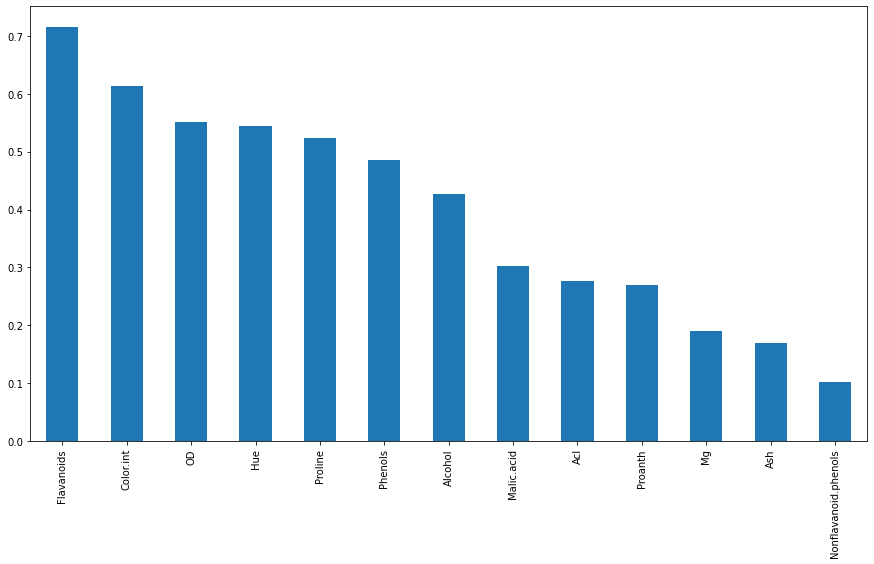

In [140]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [141]:
#No we Will select the  top 5 important features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

sel_best_cols = SelectKBest(mutual_info_classif, k=5)


In [142]:
sel_best_cols.fit(X_train, y_train)#wine is output variable


SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000001E1A9A4F8B0>)

In [143]:
sel_best_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [144]:
X_train.columns[sel_best_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [108]:
X_train = X_train[['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']]

In [109]:
X_train

,Flavanoids,Color.int,Hue,OD,Proline
22,2.88,3.80,1.11,4.00,1035
108,2.04,2.70,0.86,3.02,312
175,0.69,10.20,0.59,1.56,835
145,0.55,4.00,0.60,1.68,830
71,2.86,3.38,1.36,3.16,410
...,...,...,...,...,...
103,1.64,2.06,0.94,2.44,415
67,2.00,4.68,1.12,3.48,510
117,2.09,2.06,1.06,2.96,345
47,3.39,6.10,0.91,3.33,985


In [112]:
X_test = X_test[['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']]

In [113]:
X_test

,Flavanoids,Color.int,Hue,OD,Proline
54,2.90,5.85,0.92,3.20,1060
151,1.36,10.80,0.48,1.47,480
63,3.10,4.45,1.22,2.87,420
55,2.78,6.25,0.98,3.03,1120
123,2.65,2.60,0.73,3.10,380
121,5.08,6.00,0.93,3.69,465
7,2.51,5.05,1.06,3.58,1295
160,0.92,7.65,0.56,1.58,520
106,2.03,3.40,1.00,3.17,510
90,1.50,2.40,1.08,2.27,480
